# Text Classification About Movie  Critical

##  import library

In [1]:
import tensorflow as tf
import numpy as np 
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

Import matplotlib and create a helper function to plot graphs:

In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history , metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric])
    plt.xlabel('epochs')
    plt.ylabel(metric)
    plt.legend([metric,'val_'+metric])
    plt.show()

## Load data and process data

### Dataset: IMDB Reviews

The `imdb_reviews` dataset is designed for text classification tasks, particularly sentiment analysis. It contains movie reviews from the IMDB website, with each review labeled as either positive or negative.

#### Dataset Description

The dataset is divided into two main subsets:

1. **Training Set**: Used to train text classification models. This subset includes a large number of movie reviews along with their corresponding labels (positive or negative).

2. **Test Set**: Used to evaluate the performance of models after training. This subset contains movie reviews that were not seen during training, allowing for the assessment of the model's ability to generalize to new data.

#### Data Structure

Each item in the dataset consists of:

- **Review**: A text string containing the review of a movie written by a user.
- **Label**: A label indicating the sentiment of the review. Labels are typically classified into two categories: positive and negative.

#### Usage

The `imdb_reviews` dataset is commonly used to test natural language processing (NLP) models on tasks such as sentiment analysis. Movie reviews provide a rich context for evaluating model performance on real-world textual data.

#### Additional Information

For more details about the dataset, such as data statistics and column descriptions, specific metadata is available. This information helps in understanding the structure and content of the dataset.


In [3]:
## Text Classification About Movie  Critical
dataset , inf = tfds.load('imdb_reviews',with_info=True,as_supervised=True)

train_dataset, test_dataset =dataset['train'], dataset['test']
train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [4]:
# Obtenir un exemple du dataset
for example in train_dataset.take(1):
    text, label = example
    print(f'Texte : {text.numpy()}')
    print(f'Étiquette : {label.numpy()}')
    print(f'Forme du texte : {text.shape}')
    print(f'Forme de l\'étiquette : {label.shape}')
    print(f'Type du texte : {text.dtype}')
    print(f'Type de l\'étiquette : {label.dtype}')


Texte : b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Étiquette : 0
Forme du texte : ()
Forme de l'étiquette : ()
Type du texte : <dtype: 'string'>
Type de l'étiquette : <dtype: 'int64'>


In [5]:
import numpy as np

# Extraire un petit sous-ensemble des données
texts = []
labels = []

for text, label in tqdm.tqdm(train_dataset," ====>  "):  # Prenons 100 exemples pour l'exemple
    texts.append(str(text.numpy())) #decode('utf-8')
    labels.append(label.numpy())

# Convertir les listes en tableaux NumPy
texts_np = np.array(texts)
labels_np = np.array(labels)

print(f'Forme des textes : {texts_np.shape}')
print(f'Forme des étiquettes : {labels_np.shape}')
    
    

 ====>  : 100%|██████████| 25000/25000 [00:17<00:00, 1390.20it/s]

Forme des textes : (25000,)
Forme des étiquettes : (25000,)


In [6]:
for item in texts[:5]:
    print(item)
    print("---"*50)

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
------------------------------------------------------------------------------------------------------------------------------------------------------
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm 

In [7]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts_np)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=200)

In [8]:
# Afficher le vocabulaire
word_index = tokenizer.word_index
print("Vocabulaire (mot : index) :")
for word, index in word_index.items():
    print(f'{word}: {index}')


Vocabulaire (mot : index) :
the: 1
and: 2
a: 3
of: 4
to: 5
is: 6
br: 7
in: 8
it: 9
i: 10
this: 11
that: 12
was: 13
as: 14
for: 15
with: 16
movie: 17
but: 18
film: 19
's: 20
on: 21
you: 22
not: 23
are: 24
his: 25
he: 26
have: 27
be: 28
one: 29
all: 30
at: 31
by: 32
they: 33
an: 34
who: 35
so: 36
from: 37
like: 38
her: 39
't: 40
or: 41
just: 42
there: 43
about: 44
out: 45
': 46
has: 47
if: 48
some: 49
what: 50
good: 51
more: 52
very: 53
when: 54
she: 55
up: 56
can: 57
b: 58
time: 59
no: 60
even: 61
my: 62
would: 63
which: 64
story: 65
only: 66
really: 67
see: 68
their: 69
had: 70
were: 71
me: 72
well: 73
we: 74
than: 75
much: 76
been: 77
get: 78
bad: 79
will: 80
people: 81
do: 82
also: 83
other: 84
into: 85
because: 86
great: 87
first: 88
him: 89
how: 90
most: 91
made: 92
its: 93
then: 94
way: 95
make: 96
them: 97
could: 98
too: 99
movies: 100
any: 101
it's: 102
after: 103
think: 104
characters: 105
watch: 106
two: 107
films: 108
character: 109
seen: 110
many: 111
life: 112
being: 113
pl

In [9]:
for i in range(4):
    print(texts_np[i])
    print(data[i])
    print("----"*100)

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   

In [10]:
int2word = {1: 'positif', 0: 'negatif'}
print(labels_np[:10])

[0 0 0 1 1 1 0 0 0 0]


In [11]:

Label_tocatgary =to_categorical(labels_np)
print(Label_tocatgary[:10])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [12]:
X_train,X_test, Y_train ,Y_test = train_test_split(data,Label_tocatgary,test_size=0.25,random_state=7)

In [13]:
# Print shapes of the split datasets
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)
print('Y_test:', X_train.shape[1])

X_train: (18750, 200)
X_test: (6250, 200)
Y_train: (18750, 2)
Y_test: (6250, 2)
Y_test: 200


## build model

### Model Architecture

#### Model Type: Sequential

The model is a Sequential neural network, which means layers are stacked in a linear sequence.

#### Layers:

1. **Embedding Layer**
   - **Purpose**: Converts input integer sequences into dense vector representations. This layer is commonly used in NLP to represent words in a continuous vector space.
   - **Parameters**:
     - `input_dim=10000`: The size of the vocabulary. This means the model expects input sequences where each integer is in the range `[0, 9999]`.
     - `output_dim=128`: The dimensionality of the dense embedding vectors. Each word is represented as a 128-dimensional vector.
     - `input_shape=(X_train.shape[1],)`: The shape of input sequences. Here, it’s the length of each sequence in `X_train`.

   **Output Shape**: `(None, 200, 128)`  
   This indicates that the layer outputs sequences of length 200, with each word represented by a 128-dimensional vector.

   **Number of Parameters**: 1,280,000  
   Calculated as `input_dim * output_dim`, or `10000 * 128`.

2. **LSTM Layer**
   - **Purpose**: Processes sequences and captures temporal dependencies. LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) suitable for sequential data.
   - **Parameters**:
     - `64`: The number of units in the LSTM layer, which determines the dimensionality of the output space.

   **Output Shape**: `(None, 64)`  
   This indicates that the LSTM layer outputs a 64-dimensional vector for each sequence.

   **Number of Parameters**: 49,408  
   This includes parameters for the LSTM gates and the recurrent connections.

3. **Dense Layer**
   - **Purpose**: Final layer that performs classification based on the output from the LSTM layer.
   - **Parameters**:
     - `2`: The number of output neurons, which corresponds to the number of classes (e.g., positive and negative for sentiment analysis).
     - `activation='softmax'`: Applies the softmax activation function to produce probabilities for each class.

   **Output Shape**: `(None, 2)`  
   This indicates that the Dense layer outputs a 2-dimensional vector representing the class probabilities.

   **Number of Parameters**: 130  
   This includes weights and biases for the Dense layer.

#### Model Summary

- **Total Parameters**: 1,329,538  
  This is the sum of all parameters across all layers in the model.

- **Trainable Parameters**: 1,329,538  
  All parameters in this model are trainable, meaning they will be updated during the training process.

- **Non-trainable Parameters**: 0  
  There are no parameters that are fixed and not updated during training.


In [21]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128,input_shape=(X_train.shape[1],)))
model.add(LSTM(128))
model.add(Dense(2, activation='softmax'))
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,842 (5.39 MB)

 Trainable params: 1,411,842 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])


In [23]:
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    batch_size=128, 
                    epochs=5, 
                    verbose=1)

Epoch 1/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 89s 575ms/step - accuracy: 0.6833 - loss: 0.5702 - val_accuracy: 0.8653 - val_loss: 0.3201
Epoch 2/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 84s 572ms/step - accuracy: 0.9034 - loss: 0.2463 - val_accuracy: 0.8680 - val_loss: 0.3292
Epoch 3/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 80s 544ms/step - accuracy: 0.9376 - loss: 0.1735 - val_accuracy: 0.8670 - val_loss: 0.4103
Epoch 4/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 82s 558ms/step - accuracy: 0.9485 - loss: 0.1395 - val_accuracy: 0.8734 - val_loss: 0.3920
Epoch 5/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 86s 582ms/step - accuracy: 0.9719 - loss: 0.0834 - val_accuracy: 0.8488 - val_loss: 0.4484


# model evaluation

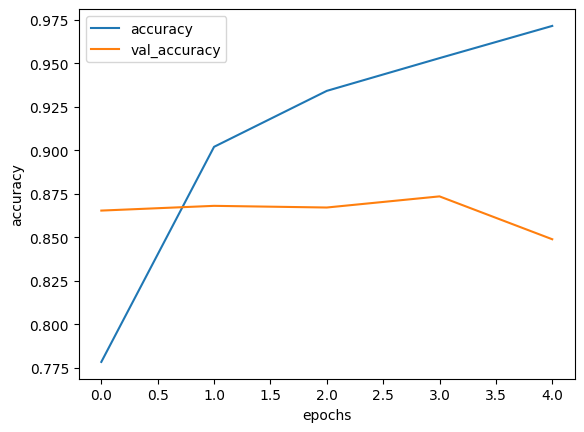

In [24]:
plot_graphs(history,"accuracy")

In [25]:
def prediction(model, sms, tokenizer, int2word, sen_length):
    # Convert the SMS to sequences
    seq = tokenizer.texts_to_sequences([sms])
    # Pad the sequences
    seq = pad_sequences(seq, maxlen=sen_length)
    # Predict the class
    predict = model.predict(seq)[0]
    # Get the class with the highest probability
    predicted_class = np.argmax(predict)
    # Convert the class index to word
    print(predicted_class)
    return int2word[predicted_class]

# Example usage:
# Assuming 'tokenizer', 'int2word', 'sen_length' are defined
sms = """

The Dark Knight is visually stunning and features strong performances, but it sometimes gets bogged down by its overambitious plot. The film’s attempt to balance multiple storylines and characters can feel unwieldy, detracting from its overall coherence
"""


predicted_label = prediction(model, sms, tokenizer, int2word, 2000)
print(predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
1
positif
